In [1]:
import scipy.io 
import matplotlib.pyplot as plt 
import data 
import pickle 
import numpy as np 

beta = scipy.io.loadmat('results/detm_un_K_20_Htheta_800_Optim_adam_Clip_0.0_ThetaAct_relu_Lr_0.001_Bsz_512_RhoSize_300_L_3_minDF_10_trainEmbeddings_1_divReg_2_label10_beta.mat')['values'] ## K x T x V
print('beta: ', beta.shape)

with open('scripts/data_grants_False/min_df_10/labels/timestamps.pkl', 'rb') as f:
    timelist = pickle.load(f)
print('timelist: ', timelist)
T = len(timelist)
ticks = [str(x) for x in timelist]
print('ticks: ', ticks)

## get vocab
data_file = 'scripts/data_grants_False/min_df_10/labels'
vocab, train, valid, test = data.get_data(data_file, temporal=True)
vocab_size = len(vocab)
print(vocab_size)
## plot topics 
num_words = 10
times = [0,30]
num_topics = 20
'''
w_lst=[]
coh_lst=[]
from palmettopy.palmetto import Palmetto
palmetto = Palmetto()


for k in range(num_topics):
    for t in times:
        gamma = beta[k, t, :]
        top_words = list(gamma.argsort()[-num_words+1:][::-1])
        topic_words = [vocab[a] for a in top_words]
        print(topic_words)
        coh_lst.append(palmetto.get_coherence(topic_words,coherence_type="ca"))
        w_lst+=top_words
        
w_set=set(w_lst)
print(len(w_set),len(w_lst))
print(np.mean(coh_lst),coh_lst)


'''
        
for k in range(num_topics):
    for t in times:
        gamma = beta[k, t, :]
        top_words = list(gamma.argsort()[-num_words+1:][::-1])
        #print(top_words)
        topic_words = [vocab[a] for a in top_words]
        #if k==5:
        print('Topic {} .. Time: {} ===> {}'.format(k, t, topic_words))

        words=topic_words[:5]
        tokens = [vocab.index(w) for w in words]
        betas = [beta[k, :, x] for x in tokens]
        for i, comp in enumerate(betas):
            plt.plot(comp, label=words[i], lw=2, linestyle='--', marker='o', markersize=4)
        plt.legend(frameon=False)
        plt.xticks(np.arange(T)[0::10],timelist[0::10])
        
        plt.savefig('plots50/{}.png'.format(k))
        plt.clf()

beta:  (20, 36, 52612)
timelist:  ['1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
ticks:  ['1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
52612
Topic 0 .. Time: 0 ===> ['tumor', 'liver', 'metabolism', 'acid', 'cancer', 'effects', 'compounds', 'synthesis', 'tumors']
Topic 0 .. Time: 30 ===> ['cancer', 'tumor', 'breast', 'tumors', 'cells', 'cell', 'patients', 'human', 'lung']
Topic 1 .. Time: 0 ===> ['studies', 'contiguous', 'attractants', 'infrequently', 'recoverable', 'learner', '179', 'leaky', 'endowed']
Topic 1

<Figure size 432x288 with 0 Axes>

idx: 0/396
idx: 20/396
idx: 40/396
idx: 60/396
idx: 80/396
idx: 100/396
idx: 120/396
idx: 140/396
idx: 160/396
idx: 180/396
idx: 200/396
idx: 220/396
idx: 240/396
idx: 260/396
idx: 280/396
idx: 300/396
idx: 320/396
idx: 340/396
idx: 360/396
idx: 380/396


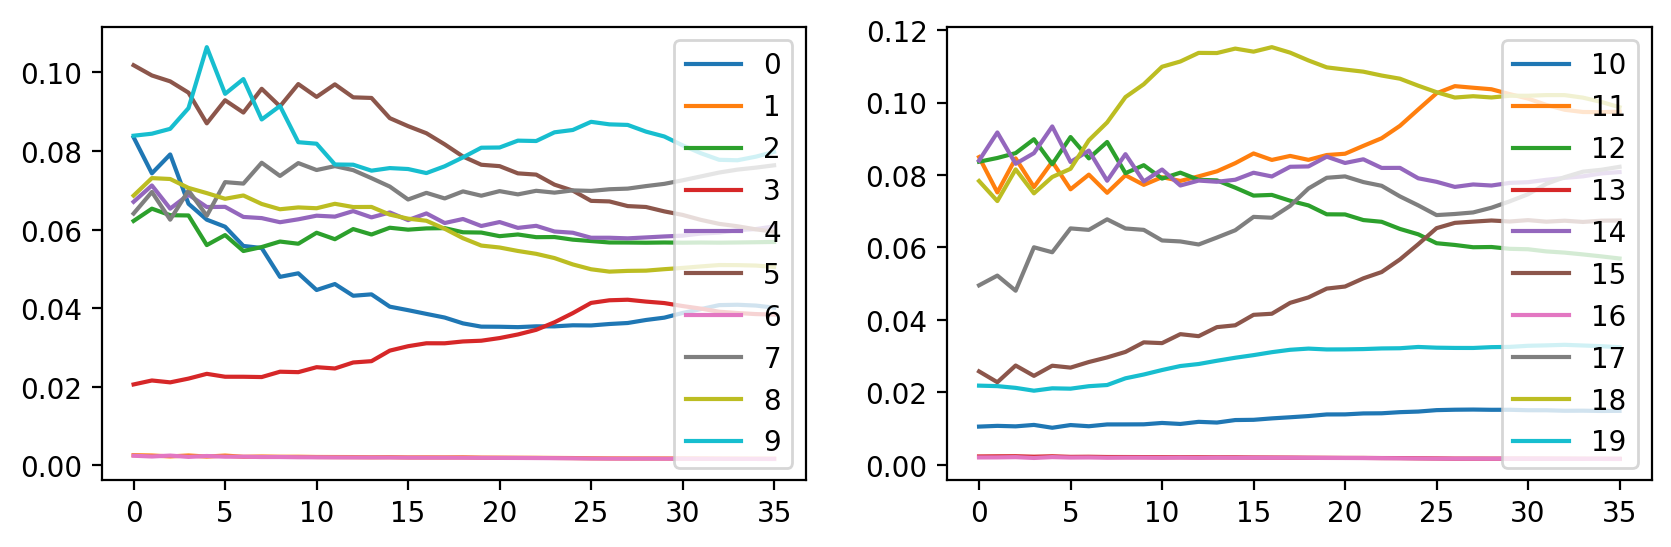

In [2]:
import torch
ckpt='results/detm_un_K_20_Htheta_800_Optim_adam_Clip_0.0_ThetaAct_relu_Lr_0.001_Bsz_512_RhoSize_300_L_3_minDF_10_trainEmbeddings_1_divReg_2_label10' ## K x T x V
with open(ckpt, 'rb') as f:
    model = torch.load(f)

train_tokens = train['tokens']
train_counts = train['counts']
train_times = train['times']
train_labels = train['labels']
num_times = len(np.unique(train_times))
num_docs_train = len(train_tokens)
train_rnn_inp = data.get_rnn_input(
    train_tokens, train_counts, train_times, num_times, vocab_size, num_docs_train)
eta=model.get_eta(train_rnn_inp)

from scipy.special import softmax
prob_eta=softmax(eta[0].cpu().detach(),axis=1)
prob_eta[0]
fig,ax=plt.subplots(1,2,dpi=200,figsize=(10,3))

for i in range(20):
    ax[i//10].plot(list(range(len(prob_eta))),prob_eta[:,i],label=i)
ax[0].legend()
ax[1].legend()

np.arange(T)[0::10]:  [ 0 10 20 30]


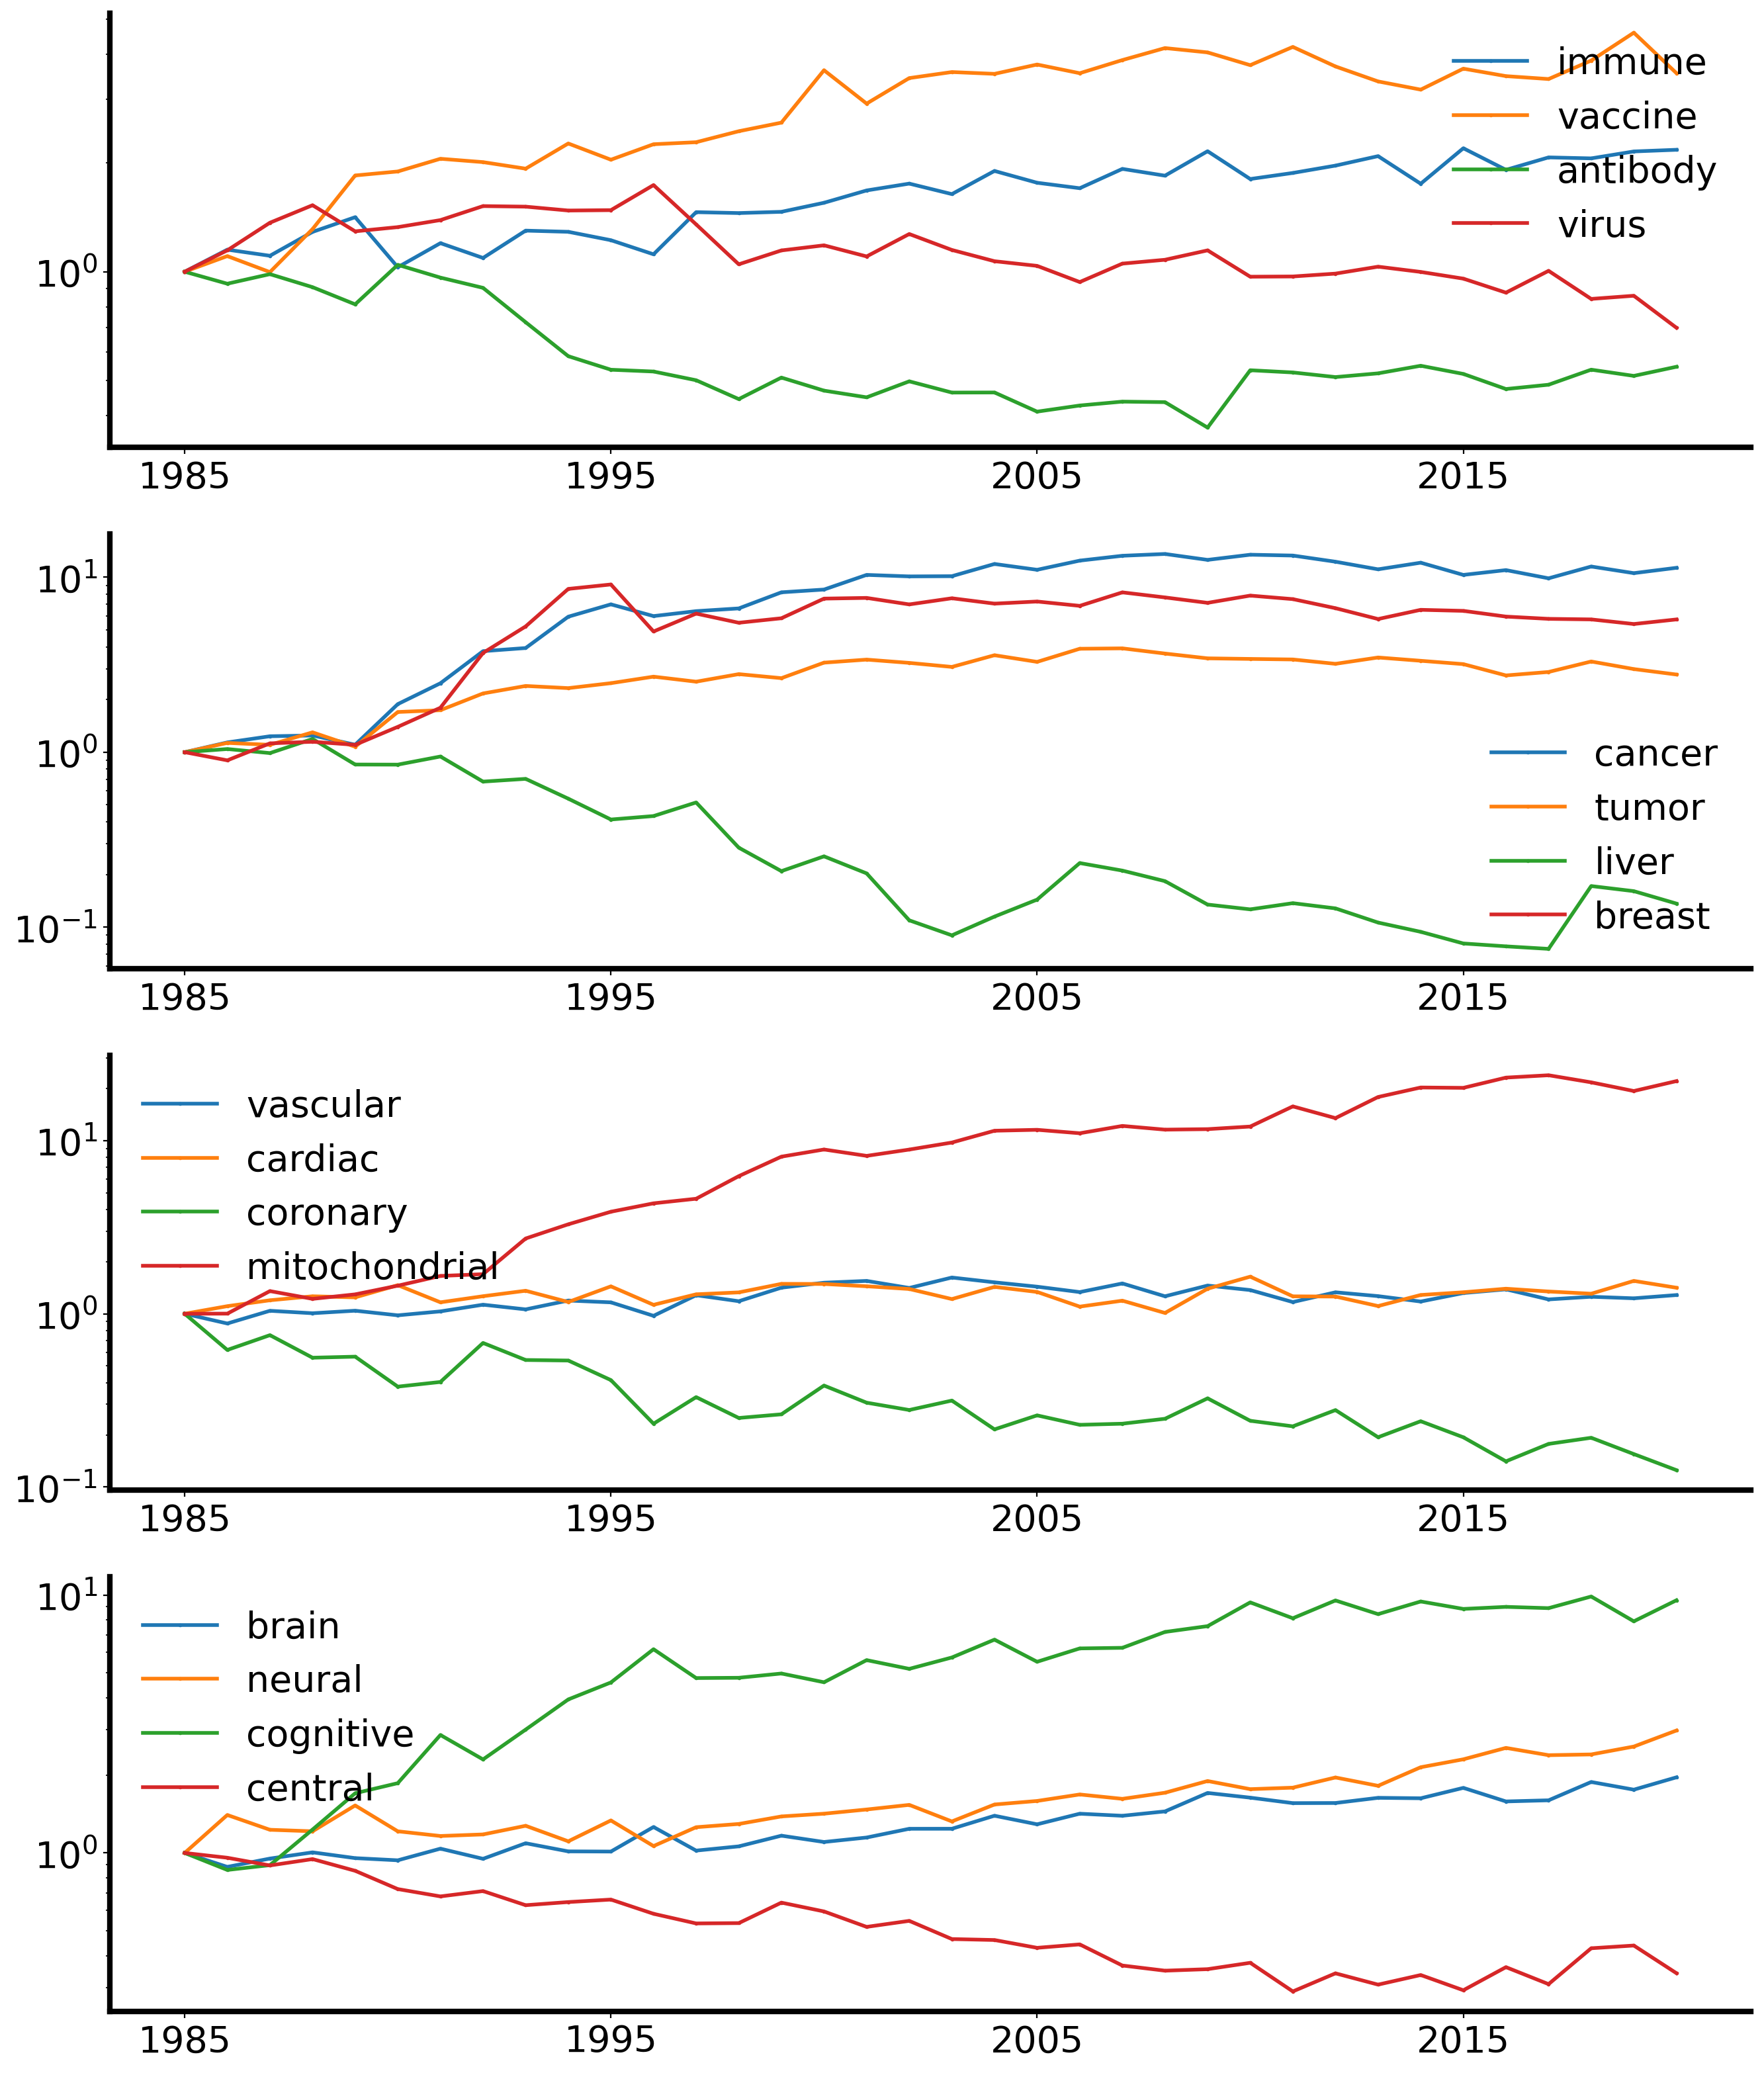

In [5]:
import matplotlib
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
titlesize=25
legendsize=20
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16, 20), dpi=200, facecolor='w', edgecolor='k')
ax1, ax2, ax3, ax4 = axes.flatten()
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax4.set_yscale('log')
ticks = [str(x) for x in timelist]
for ax in axes.flatten():
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
matplotlib.rcParams['axes.linewidth'] = 3
words_1 = ['immune', 'vaccine', 'antibody', 'virus']
tokens_1 = [vocab.index(w) for w in words_1]
betas_1 = [beta[8, :, x] for x in tokens_1]
for i, comp in enumerate(betas_1):
    ax1.plot(range(T), comp/comp[0], label=words_1[i], lw=2, marker='o', markersize=1)
ax1.legend(frameon=False,prop={'size': legendsize})
print('np.arange(T)[0::10]: ', np.arange(T)[0::10])
ax1.set_xticks(np.arange(T)[0::10])
ax1.set_xticklabels(timelist[0::10])
##ax1.set_title('Topic "Immune"', fontsize=titlesize)


words_2 = ['cancer', 'tumor', 'liver', 'breast']
tokens_2 = [vocab.index(w) for w in words_2]
betas_2 = [beta[0, :, x] for x in tokens_2]
for i, comp in enumerate(betas_2):
    ax2.plot(range(T), comp/comp[0], label=words_2[i], lw=2, marker='o', markersize=1)
ax2.legend(frameon=False, prop={'size': legendsize})
ax2.set_xticks(np.arange(T)[0::10])
ax2.set_xticklabels(timelist[0::10])
#ax2.set_title('Topic "Cancer"', fontsize=titlesize)


words_3 = ['vascular', 'cardiac', 'coronary', 'mitochondrial']
tokens_3 = [vocab.index(w) for w in words_3]
betas_3 = [beta[2, :, x] for x in tokens_3]
for i, comp in enumerate(betas_3):
    ax3.plot(range(T), comp/comp[0], label=words_3[i], lw=2, marker='o', markersize=1)
ax3.legend(frameon=False, prop={'size': legendsize})
ax3.set_xticks(np.arange(T)[0::10])
ax3.set_xticklabels(timelist[0::10])
#ax3.set_title('Topic "Vascular"', fontsize=titlesize)


words_4 = ['brain', 'neural', 'cognitive', 'central']
tokens_4 = [vocab.index(w) for w in words_4]
betas_4 = [beta[4, :, x] for x in tokens_4]
for i, comp in enumerate(betas_4):
    ax4.plot(range(T), comp/comp[0], label=words_4[i], lw=2, marker='o', markersize=1)
ax4.legend(frameon=False, prop={'size': legendsize})
ax4.set_xticks(np.arange(T)[0::10])
ax4.set_xticklabels(timelist[0::10])
#ax4.set_title('Topic "Neural"', fontsize=titlesize)

plt.savefig('word_evolution.pdf')
plt.show()


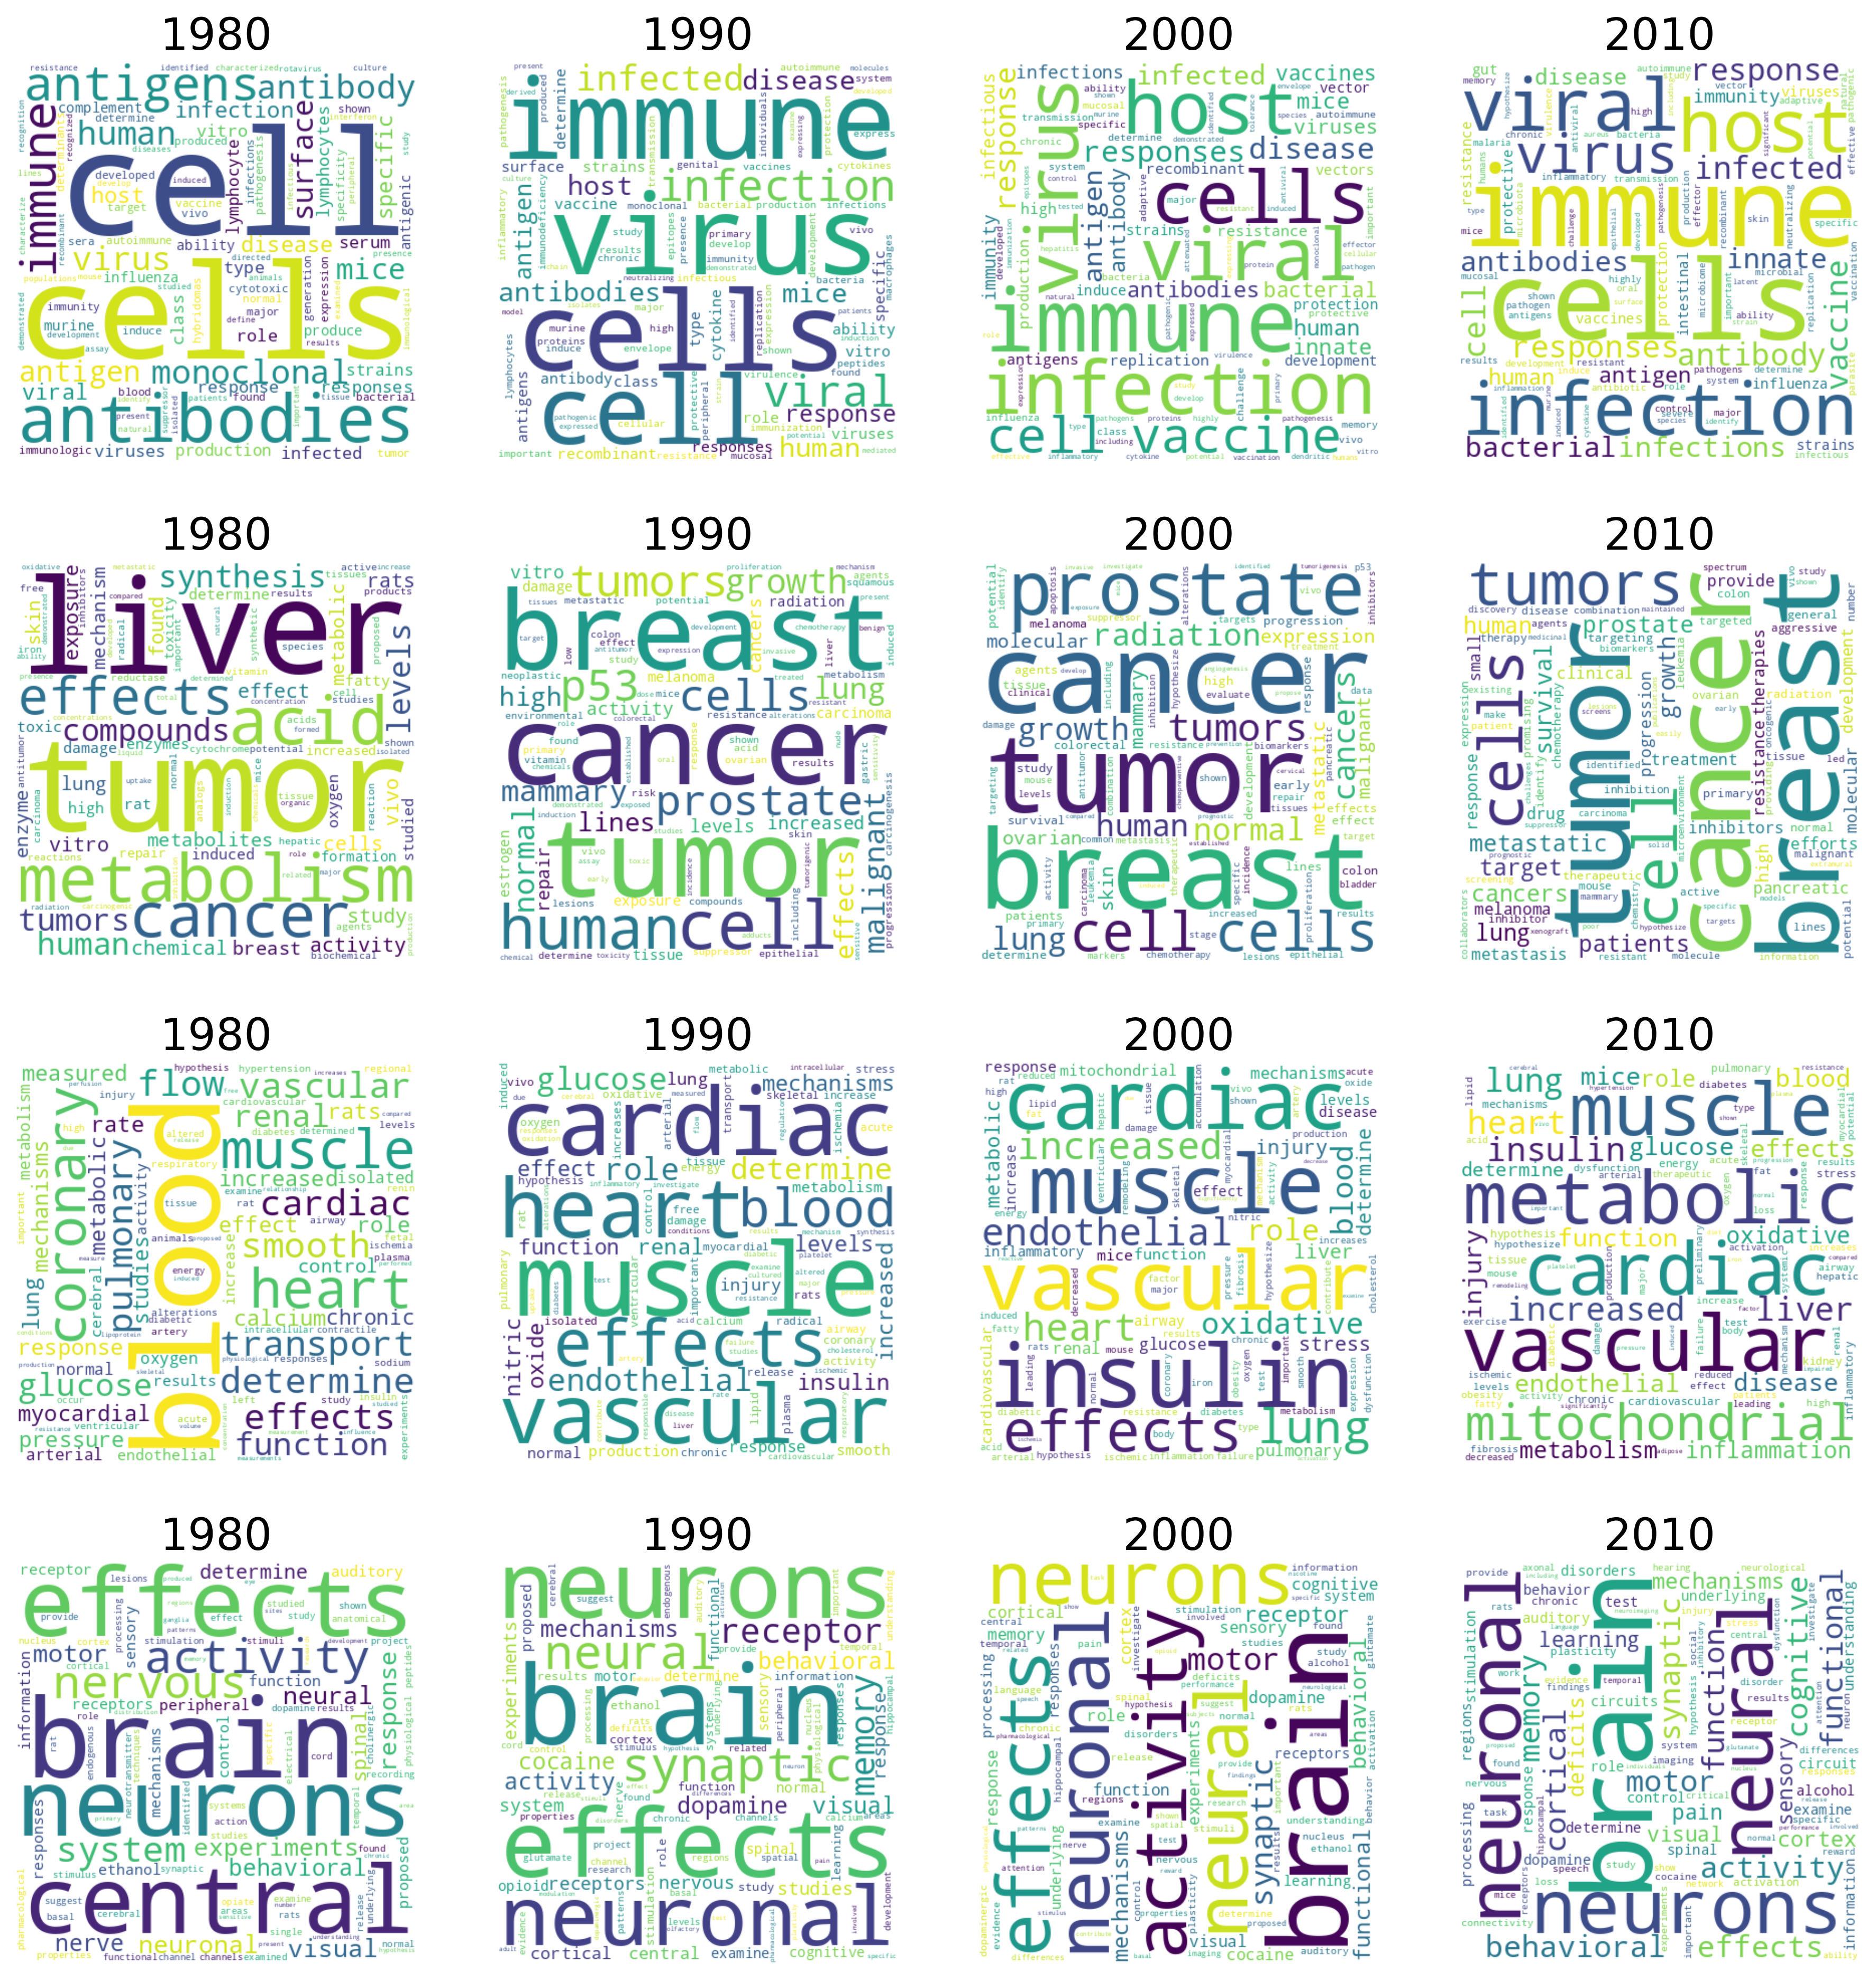

In [4]:
from wordcloud import WordCloud
time_lst=[0,10,20,30]
tp_lst=[8,0,2,4]
titlesize=20
fig,ax=plt.subplots(4,len(time_lst),dpi=300,figsize=(15,16))
#for m,tp in enumerate(topic_lst):
for r,tp in enumerate(tp_lst):
    for k,t in enumerate(time_lst):
        wc = WordCloud(background_color="white", repeat=True, max_words=100,width=400, height=400)
        wc.generate_from_frequencies({vocab[i]:beta[tp,t,i] for i in range(vocab_size)})
        ax[r][k].axis("off")
        ax[r][k].imshow(wc, interpolation="bilinear")
        ax[r][k].set_title(t+1980,fontsize=titlesize)
plt.savefig('wc16.pdf')